# ZINDI HACKATON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
samplesubmission = pd.read_csv("Sample_submission.csv")

## DATA CLEANING

In [3]:
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [4]:
test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [5]:
train.drop_duplicates(inplace = True)

In [6]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 875.0+ KB


In [8]:
print("missing values:", train.isnull().sum())

missing values: ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64


In [9]:
print("missing values:", test.isnull().sum())

missing values: ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64


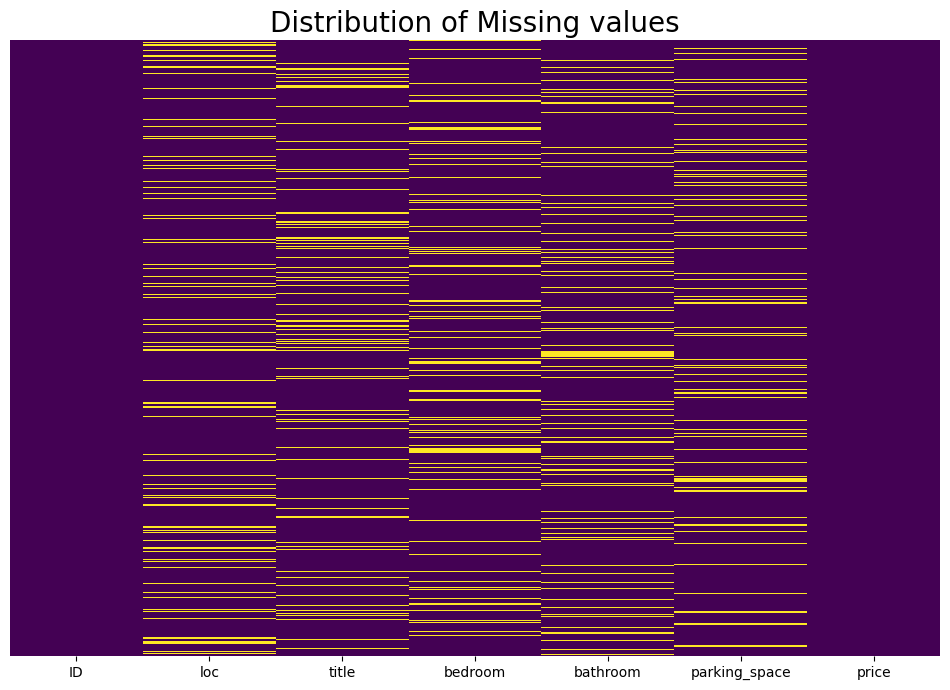

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Distribution of Missing values", fontsize=20)
plt.show()

In [11]:
train = train.reset_index(drop=True)
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [12]:
print("missing values:", train.isnull().sum())

missing values: ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64


In [13]:
train = train.dropna(subset=['loc', 'title'])

In [14]:
train.parking_space = train.parking_space.fillna(train.parking_space.mean())
train.bedroom = train.bedroom.fillna(train.bedroom.mean())
train.bathroom = train.bathroom.fillna(train.bathroom.mean())

In [15]:
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,2748,Ondo,Apartment,4.296861,2.0,4.000000,1672416.689
3,2224,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,10300,Kogi,Terrace duplex,4.296861,5.0,6.000000,2600700.898
5,1733,Borno,Mansion,4.296861,1.0,3.000000,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.000000,1.0,6.000000,2837199.086
13995,6175,Edo,Bungalow,4.296861,7.0,3.163883,2367927.861
13996,9704,Kaduna,Apartment,4.296861,7.0,5.000000,2228516.471
13997,11190,Plateau,Bungalow,8.000000,6.0,5.000000,2406812.693


In [16]:
print("missing values:", train.isnull().sum())

missing values: ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64


In [17]:
train.drop('ID', axis=1, inplace=True)

In [18]:
train.head(5)

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.000000,2.0,1.0,1149999.565
1,Ondo,Apartment,4.296861,2.0,4.0,1672416.689
3,Anambra,Detached duplex,5.000000,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.296861,5.0,6.0,2600700.898
5,Borno,Mansion,4.296861,1.0,3.0,1341750.867


In [19]:
train['loc'].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Lagos',
       'Akwa Ibom', 'Ekiti'], dtype=object)

In [20]:
train['title'].unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [21]:
test['loc'].unique()

array(['Kano', 'Adamawa', 'Lagos', 'Gombe', 'Edo', 'Niger', 'Anambra',
       'Benue', 'Ogun', 'Kogi', 'Taraba', 'Yobe', 'Zamfara', 'Borno',
       'Enugu', 'Ekiti', 'Delta', 'Osun', 'Oyo', 'Bauchi', 'Kwara',
       'Katsina', 'Cross River', 'Ondo', 'Akwa Ibom', 'Nasarawa',
       'Ebonyi', 'Plateau', 'Kaduna', 'Sokoto', 'Kebbi', 'Bayelsa',
       'Jigawa', 'Abia', 'Rivers', 'Imo'], dtype=object)

In [22]:
test['title'].unique()

array(['Penthouse', 'Apartment', 'Bungalow', 'Mansion',
       'Semi-detached duplex', 'Detached duplex', 'Flat', 'Townhouse',
       'Cottage', 'Terrace duplex'], dtype=object)

## EDA

### 1. state with the highest number of houses

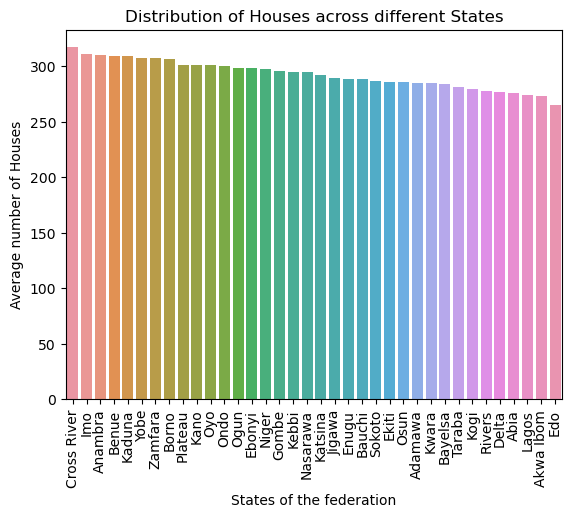

In [23]:
#plot to visualize the highest number of houses
sns.countplot(x = "loc", data = train, order=train['loc'].value_counts().index)

plt.xticks(rotation=90)

plt.xlabel('States of the federation')
plt.ylabel('Average number of Houses')

plt.title("Distribution of Houses across different States") 

plt.show()

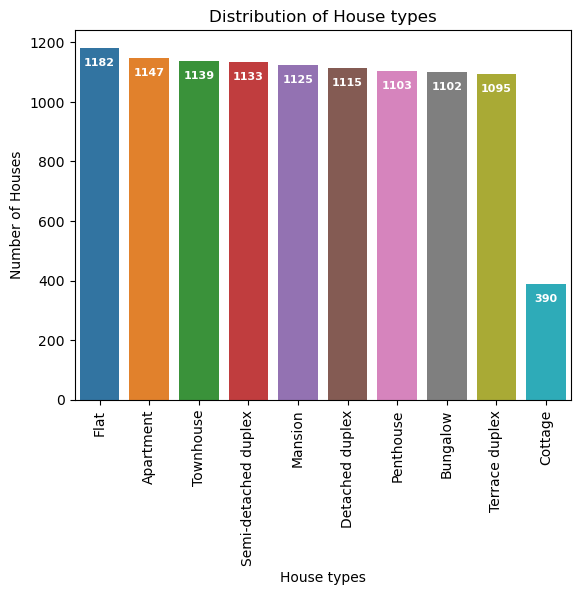

In [24]:
House_types = sns.countplot(x = "title", data = train, order=train['title'].value_counts().index)

plt.xticks(rotation=90)

plt.title("Distribution of House types")

plt.xlabel('House types')
plt.ylabel('Number of Houses')

labels = (train['title'].value_counts())
for i, v in enumerate(labels):
    House_types.text(i, v-60, str(v), horizontalalignment = 'center', size = 8, color = 'w', fontweight = 'bold')

plt.show()

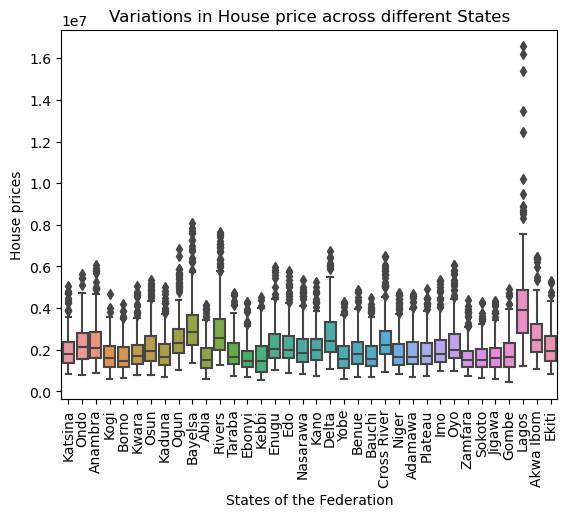

In [25]:
sns.boxplot(x='loc', y='price', data=train)

plt.title('Variations in House price across different States')

plt.xlabel('States of the Federation')
plt.ylabel('House prices')

plt.xticks(rotation=90)

plt.show()

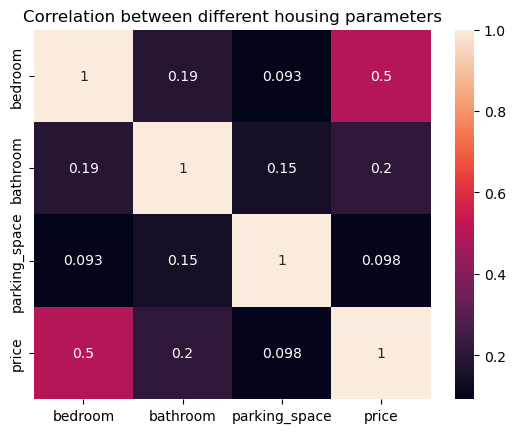

In [26]:
sns.heatmap(train.corr(), annot=True)

plt.title('Correlation between different housing parameters', fontsize=12)

plt.show()

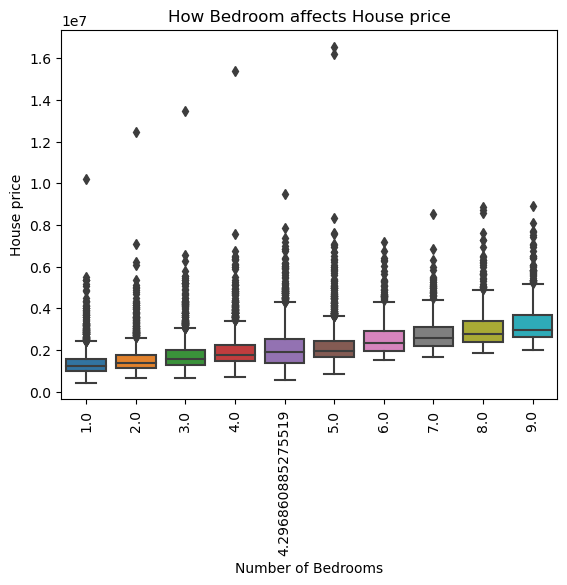

In [27]:
sns.boxplot(x='bedroom', y='price', data=train)

plt.xticks(rotation=90)

plt.title('How Bedroom affects House price')

plt.xlabel('Number of Bedrooms')
plt.ylabel('House price')

plt.show()

#there definitely is a correlation between numkb er of bedroom and house price

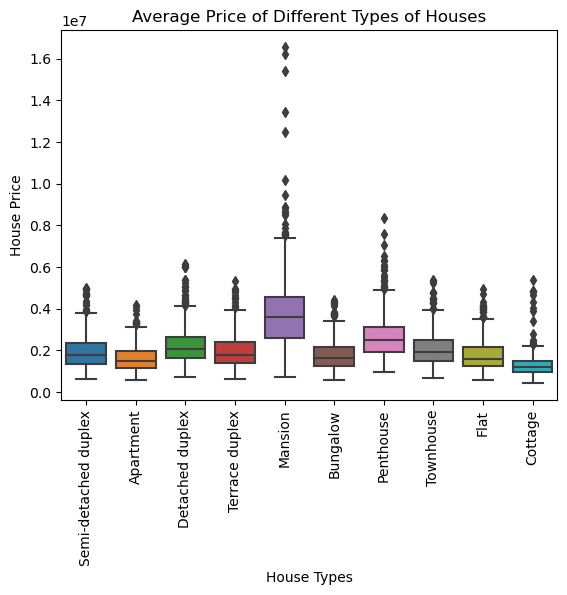

In [28]:
sns.boxplot(x='title', y='price', data=train)

plt.xticks(rotation=90)

plt.title('Average Price of Different Types of Houses')

plt.xlabel('House Types')
plt.ylabel('House Price')

plt.show()

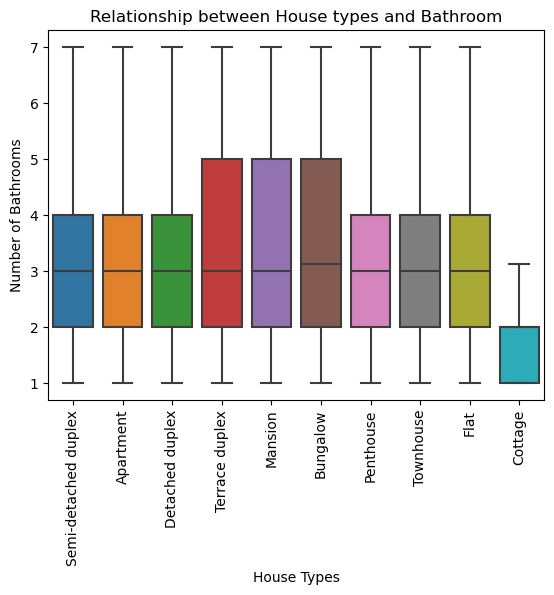

In [29]:
sns.boxplot(x='title', y='bathroom', data=train)

plt.xticks(rotation=90)

plt.title('Relationship between House types and Bathroom')

plt.xlabel('House Types')
plt.ylabel('Number of Bathrooms')

plt.show()

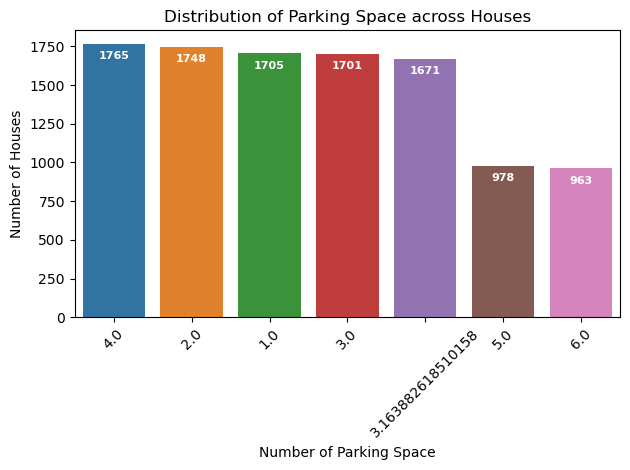

<Figure size 2000x1500 with 0 Axes>

In [30]:
# sns.displot(train['parking_space'], bins=25)

Parking_house = sns.countplot(x = "parking_space", data = train, order=train['parking_space'].value_counts().index)

plt.xticks(rotation=45)

plt.title('How Parking Space affects House Price')
plt.xlabel('Number of Parking Space')
plt.ylabel('Number of Houses')

plt.title("Distribution of Parking Space across Houses")


labels = (train['parking_space'].value_counts())
for i, v in enumerate(labels):
    Parking_house.text(i, v-100, str(v), horizontalalignment = 'center', size = 8, color = 'w', fontweight = 'bold')

plt.tight_layout()

fig = plt.figure(figsize=(20,15))

plt.show()

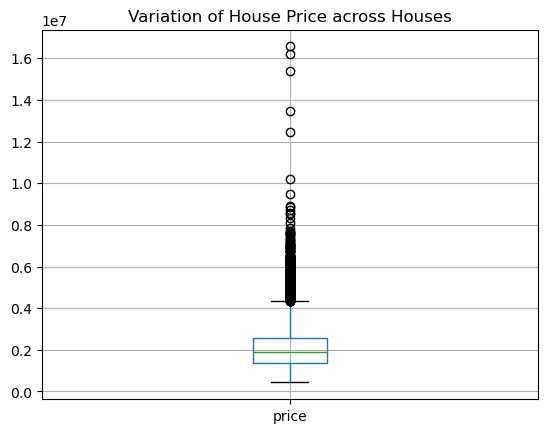

In [31]:
train.boxplot(column=['price'], return_type='axes')

plt.title('Variation of House Price across Houses')


plt.show()

In [32]:
train.groupby('title').agg(['mean'])

train.groupby('title').agg([np.mean])#dont know how to subgroup yet. come back to it later

,bedroom,bathroom,parking_space,price
,mean,mean,mean,mean
title,,,,
Apartment,4.371660,3.083959,3.282010,1.573772e+06
Bungalow,4.399896,3.380214,3.217644,1.732655e+06
Cottage,3.123075,1.746280,2.595370,1.319260e+06
Detached duplex,4.325937,3.192908,3.197316,2.208319e+06
Flat,4.397338,3.211966,3.150723,1.727680e+06
Mansion,4.333761,3.186329,3.100305,3.712847e+06
Penthouse,4.284761,3.009150,3.226528,2.622204e+06
Semi-detached duplex,4.351581,3.179650,3.161046,1.908512e+06


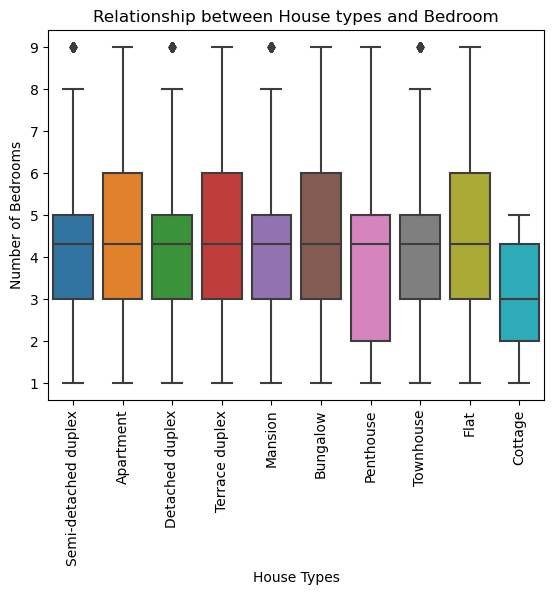

In [33]:
sns.boxplot(x='title', y='bedroom', data=train)

plt.xticks(rotation=90)

plt.title('Relationship between House types and Bedroom')

plt.xlabel('House Types')
plt.ylabel('Number of Bedrooms')

plt.show()


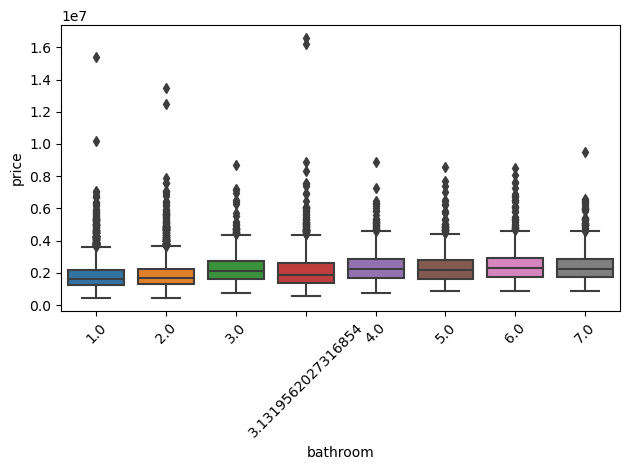

In [34]:
sns.boxplot(x='bathroom', y='price', data=train)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

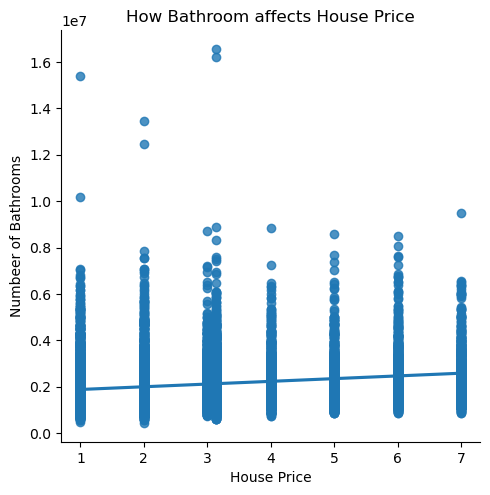

In [35]:
sns.lmplot(x='bathroom', y='price', data=train)

plt.title('How Bathroom affects House Price')

plt.xlabel('House Price')
plt.ylabel('Numbeer of Bathrooms')

plt.show()

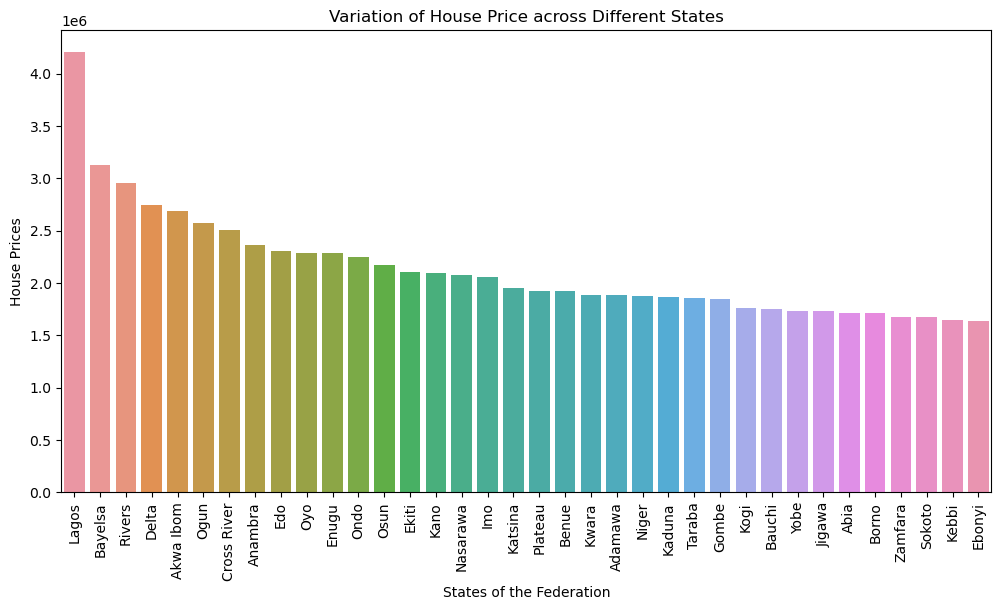

In [36]:
average_prices = train.groupby('loc')['price'].mean().reset_index()

average_prices_sorted = average_prices.sort_values(by='price', ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(data=average_prices_sorted, x='loc', y='price')

plt.title('Variation of House Price across Different States')
plt.ylabel('House Prices')
plt.xlabel('States of the Federation')

plt.xticks(rotation=90)

plt.show()

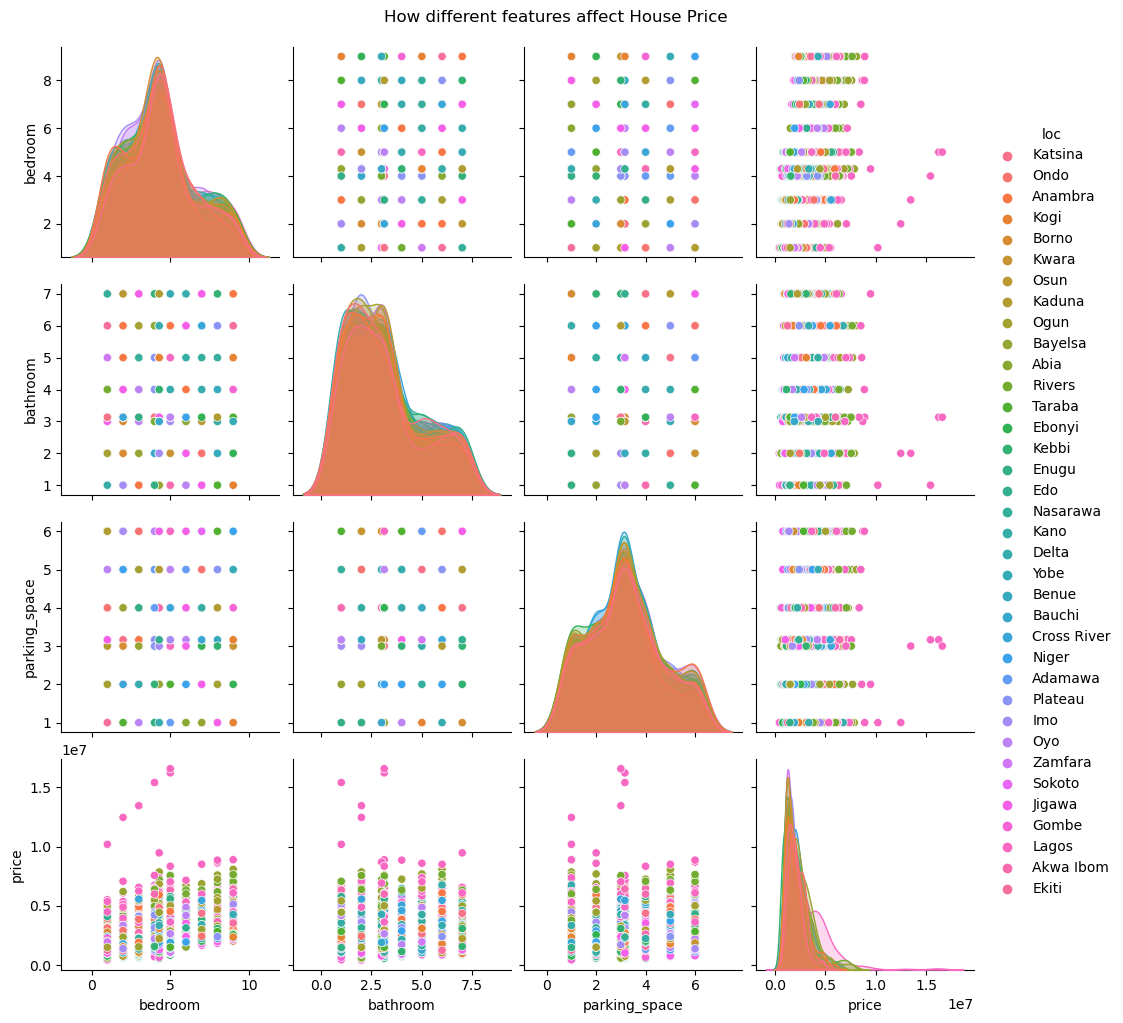

In [37]:
sns.pairplot(train, hue='loc', markers='o', diag_kind='kde')

plt.suptitle('How different features affect House Price', y=1.02)

plt.show()